Zadanie 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def abs_error(x, x_0):
    return abs(x - x_0)

def rel_error(x, x_0):
    return abs((x - x_0)/x)

x_list = [np.pi, np.e, 10*np.pi, np.math.factorial(9)]
x_0_list = [22/7, 2.718, 1397, np.sqrt(18 * np.pi) * (9/np.e)**9]

errors = [(abs_error(x[0], x[1]), rel_error(x[0], x[1])) for x in zip(x_list, x_0_list)]
for er in errors:
    print("Absolute error: {0}, relativer error: {1}".format(er[0], er[1]))

Absolute error: 0.0012644892673496777, relativer error: 0.0004024994347707008
Absolute error: 0.0002818284590451192, relativer error: 0.00010367889601972718
Absolute error: 1365.5840734641022, relativer error: 43.467891099875565
Absolute error: 3343.1271580516477, relativer error: 0.009212762230080598


Zadanie 2.
1. Nie, nie zależy i jest równa pi
3. Zwiększa się do pewnego momentu, a potem jest stały
4. Jest to błąd zaokrląglenia

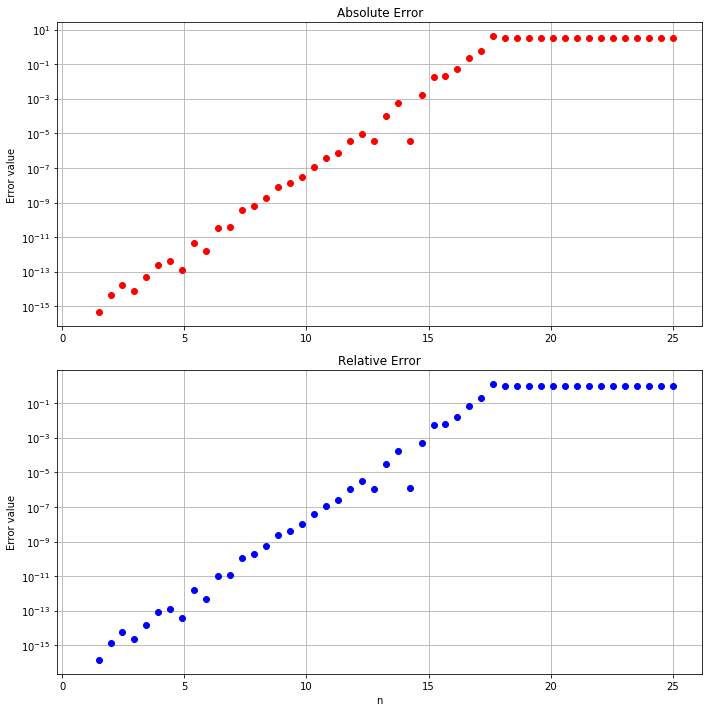

In [42]:
G = lambda p: 1/p * (10**p * (1 + np.pi*p * 10**(-p)) - 10**p)

x = np.linspace(1, 25)
y_abs_error = [abs_error(np.pi, G(_x)) for _x in x]
y_rel_error = [rel_error(np.pi, G(_x)) for _x in x]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax1.semilogy(x, y_abs_error, 'ro')
ax1.set(title='Absolute Error')
ax1.set(ylabel='Error value')
ax1.grid()

ax2.semilogy(x, y_rel_error, 'bo')
ax2.set(title='Relative Error')
ax2.set(ylabel='Error value')
ax2.grid()

plt.xlabel('n')
fig.tight_layout()
plt.show()

Zadanie 3.
Gdy sumujemy "od tyłu" błąd w pewnym momencie zanika

Relative error for e approximation with n=5: 0.0005941848175817597
Relative error for e approximation with n=10: 1.0047766310211053e-08
Absolute error for e approximation with n=5: 0.0016151617923787498
Absolute error for e approximation with n=10: 2.7312660577649694e-08


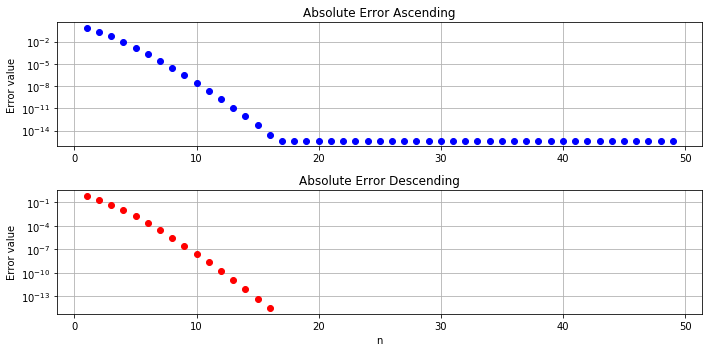

In [40]:
def approx_e_asc(n):
    return sum([1/np.math.factorial(x) for x in range(n+1)])


def approx_e_desc(n):
    return sum(reversed([1/np.math.factorial(x) for x in range(n+1)]))


fs = "{0} error for e approximation with n={1}: {2}"
print(fs.format("Relative", 5, rel_error(np.e, approx_e_asc(5))))
print(fs.format("Relative", 10, rel_error(np.e, approx_e_asc(10))))
print(fs.format("Absolute", 5, abs_error(np.e, approx_e_asc(5))))
print(fs.format("Absolute", 10, abs_error(np.e, approx_e_asc(10))))


x = np.arange(1, 50)
y_asc_error = [abs_error(np.e, approx_e_asc(_x)) for _x in x]
y_desc_error = [abs_error(np.e, approx_e_desc(_x)) for _x in x]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax1.semilogy(x, y_asc_error, 'bo')
ax1.set(title='Absolute Error Ascending')
ax1.set(ylabel='Error value')
ax1.grid()

ax2.semilogy(x, y_desc_error, 'ro')
ax2.set(title='Absolute Error Descending')
ax2.set(ylabel='Error value')
ax2.grid()

plt.xlabel('n')
fig.tight_layout()
plt.show()

Zadanie 4.
Mamy tu do czynienia z błędem reprezentacji. Jeśli dzielimy przez potęgę dwójki to w pewnym momencie zaczyna brakować bitów mantysy do zapisu, a z kolei jeśli dzielimy przez coś co potęgą dwójki nie jest, to liczba tak nie ma skończonej reprezentacji w systemi binarnym.
Mantysa zajmuje 53 bity

In [1]:
def find_the_smallest(n):
    a = 1.0
    b = 1.0
    i = 0
    while True:
        if (a + b - a - b) != 0.0:
            return [b * n, i]
        b /= n
        i += 1
        
print(find_the_smallest(2))
print(find_the_smallest(8)[0])
print(find_the_smallest(10)[0])
print(find_the_smallest(5)[0])

[2.220446049250313e-16, 53]
4.440892098500626e-16
1.0
1.0


Zadanie 5.
Mamy tu do czynienia z błędem obcięcia

In [35]:
def approx_pi(n):
    return np.sqrt(6 * sum([1/(x**2) for x in range(1, n+1)]))

print(approx_pi(100))
print(approx_pi(1000))
print(approx_pi(10000))
print(approx_pi(100000))
print(approx_pi(1000000))
print(approx_pi(100000000))
print(np.pi)

3.1320765318091053
3.1406380562059946
3.1414971639472147
3.141583104326456
3.1415916986605086
3.14159264498239
3.141592653589793
